In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cd drive/MyDrive/NMIMS/yolo

[Errno 2] No such file or directory: 'drive/MyDrive/NMIMS/yolo'
/content/drive/MyDrive/NMIMS/yolo


In [7]:
ls

coco.names  image.jpg  yolov4.cfg  yolov4.weights


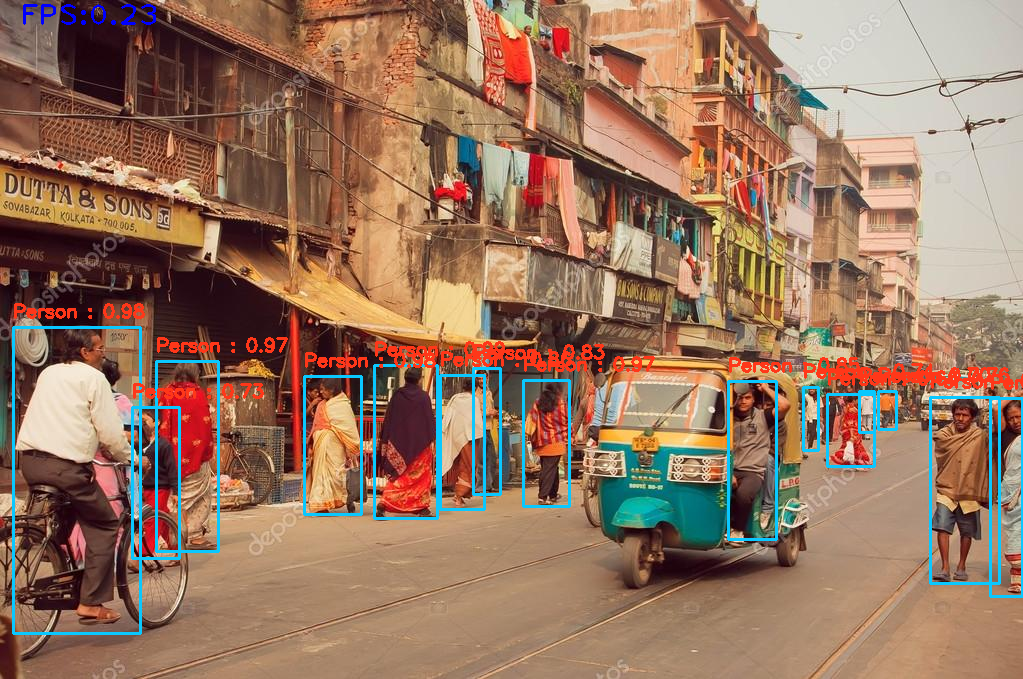

In [11]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

confidence = 0.6
Nms = 0.3
class_names = []
with open("coco.names", "r") as f:
    class_names = [cname.strip() for cname in f.readlines()]
img = cv2.imread("image.jpg")
arc = cv2.dnn.readNet("yolov4.weights", "yolov4.cfg")
arc.setPreferableBackend(cv2.dnn.DNN_BACKEND_CUDA)
arc.setPreferableTarget(cv2.dnn.DNN_TARGET_CUDA_FP16)
model = cv2.dnn_DetectionModel(arc)
model.setInputParams(size=(640, 640), scale=1/255, swapRB=True)
x = time.time()
classes, scores, boxes = model.detect(img, confidence, Nms)
y = time.time()
fps = 1 / (y - x)

for (classid, score, box) in zip(classes, scores, boxes):
    classid_value = classid  # Class index
    class_name = class_names[classid_value]  # Get the class name using the index

    if class_name == "person":
        label = "Person : %.2f" % score
        cv2.rectangle(img, box, color=(255, 200, 10), thickness=2)
        cv2.putText(img, label, (box[0], box[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (25, 55, 255), 2)

cv2.putText(img, "FPS:{0:.2f}".format(fps), (20, 25), cv2.FONT_HERSHEY_PLAIN, fontScale=2, color=(255, 0, 0), thickness=2)

cv2_imshow(img)
